In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
sal = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [11]:
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [12]:
sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

About the columns in the dataset
Rank: This column tells about the rank earned by the person basis on diffrent other factors

disipline:- it shows us the measure of work they have achived in evrything they have done

Years_since_phd: This column tells us that how many years completed after the person had done Phd. degree

Years_service: This column tells us about that how many years of experince he/she has in a company

Sex: This column given the sex-ratio of male vs female .

Salary: this is our Output or label column for prediction

In [13]:
sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

so we can see that there is no Null values present in this Dataset

Performing the EDA

In [14]:
sal['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

so we have 358 males and only 39 females here

<AxesSubplot:xlabel='sex', ylabel='count'>

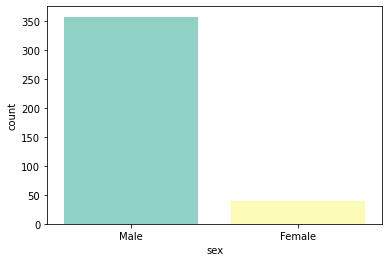

In [16]:
sns.countplot(sal['sex'], palette='Set3', saturation=0.9, dodge=True)

More of Males and less of females

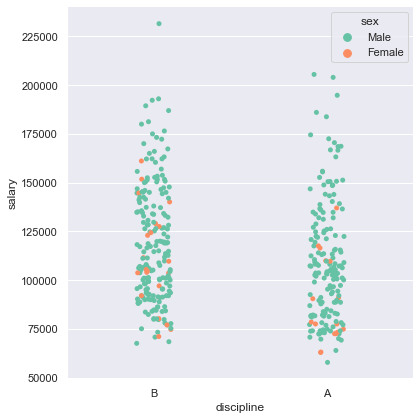

In [17]:
sns.set_theme(style="darkgrid")
sns.catplot(x="discipline", y="salary", hue="sex", data=sal,  height=6, aspect=1, palette='Set2',legend_out=False)

Observations:

1. As we  can see  that according to discipline also we  have more  males salary and less female salary

2. As we can see  according  to  the discipline  we have more of males  in both  the  discipline A & B

3. The B  category  discipline has the Max amount  of salary than  A

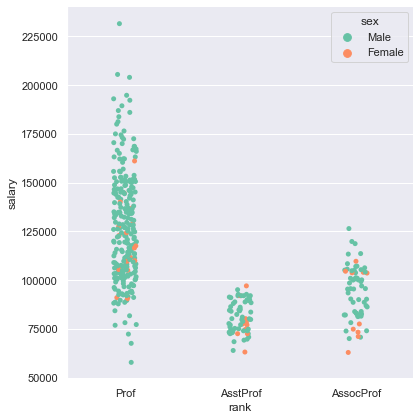

In [18]:
sns.set_theme(style="darkgrid")
sns.catplot(x="rank", y="salary", hue="sex", data=sal,  height=6, aspect=1, palette='Set2',legend_out=False)

observations:
1.Here  we  can easily  identify  that in each of  the 3 ranks  we  have more number of males than that of 
     females

2. Here we  can say  that
    Prof-rank: has  the  highest salary counts with ranks count
    Asstprof_rank: has  the lowest salary counts with  ranks counts  too
    Assocprof_rank: has the medium salary counts with ranks  counts too.

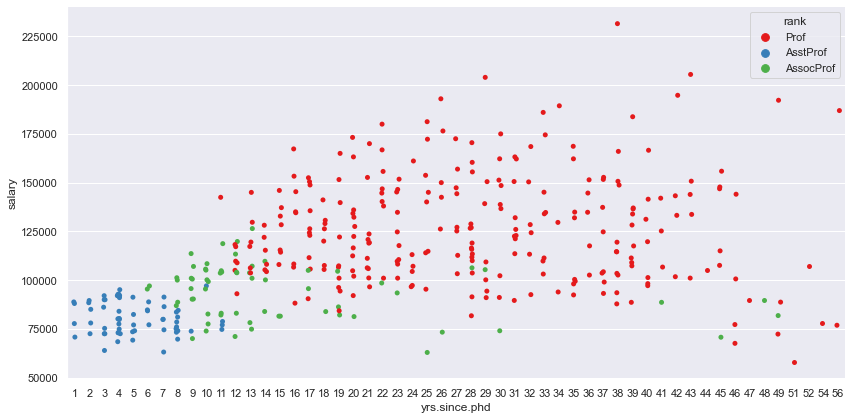

In [19]:
sns.set_theme(style="darkgrid")
sns.catplot(x="yrs.since.phd", y="salary", hue="rank", data=sal,  height=6, aspect=2, palette='Set1',legend_out=False)

Observations:

 1 . As it  can be seen  that  the according  to increase  in  the years  of phd  completed  the  salary is 
       moving  up  simultaneously

 2.  As it  can be seen  that the rank prof  is more  in case  of completition of degree Phd.

Finding the Correlation

In [21]:
sal.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [22]:
sal.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

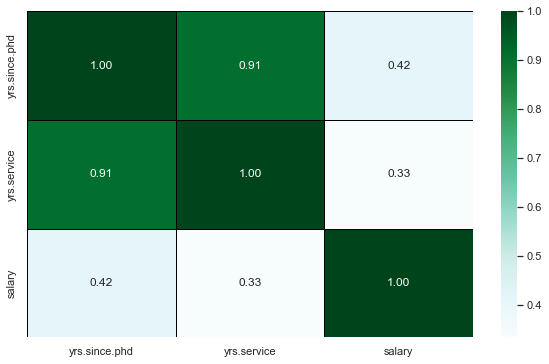

In [23]:
import matplotlib.pyplot  as plt
# making  the  canvas  size
plt.figure(figsize=(10,6))
sns.heatmap(sal.corr(),annot =True, linewidths=0.5, linecolor='black', fmt='.2f',cmap='BuGn')

Observations:

1. yrs.since.phd  is 42% correlated to salary  which is a   good score
2. yrs.service  is 33% correlated  to salary  whcih is also a   good score

In [25]:
sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


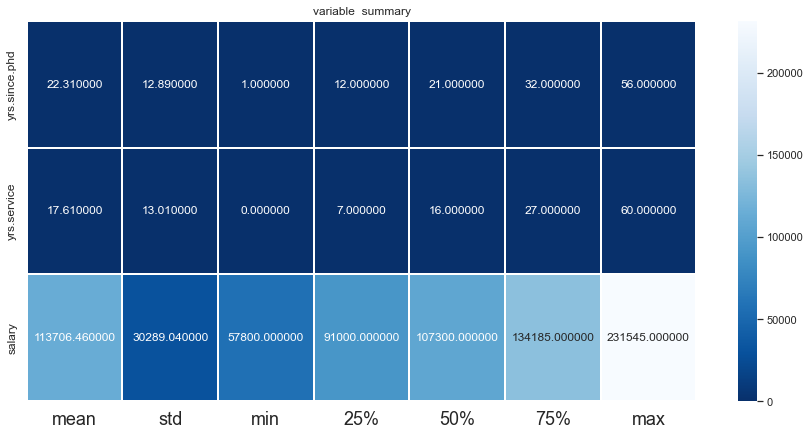

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(round(sal.describe()[1:].transpose(),2), linewidth =2, fmt='f', annot=True,cmap='Blues_r')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variable  summary')
plt.show()

observations:

yrs.since.phd:
    mean=22.314681
    std= 12.887
    min= 1.0000
    max = 56.000

yrs.service:
    mean=17.6146
    std=13.006024
    min=0.000
    max= 60.000

salary:
    mean=113706.4584
    std= 30289.038
    min=57800.000
    max =231545.0000

In [27]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB



Outliers Checking

<AxesSubplot:xlabel='yrs.since.phd'>

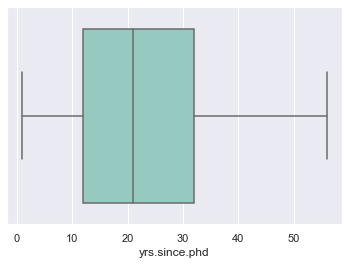

In [28]:
sns.boxplot(sal['yrs.since.phd'], palette='Set3')

<AxesSubplot:xlabel='yrs.service'>

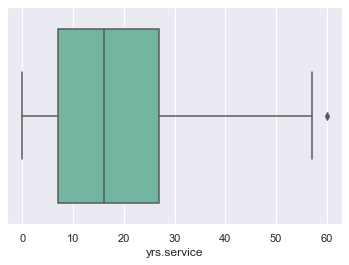

In [29]:
sns.boxplot(sal['yrs.service'], palette='Set2')

Checking the Skewness in the Dataset

In [30]:
sal.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

Graph reprresentation of the columns

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

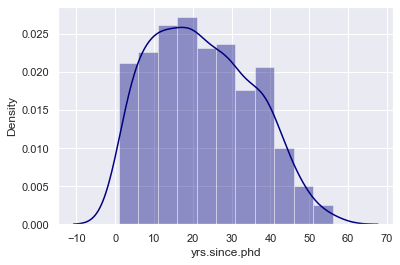

In [32]:
 sns.distplot(sal['yrs.since.phd'], color ='navy')

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

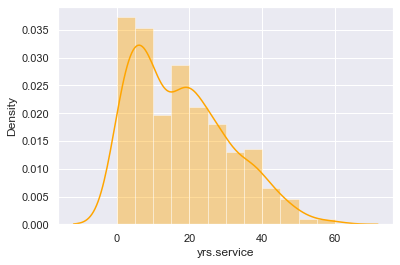

In [33]:
sns.distplot(sal['yrs.service'], color='orange')

observations - As the skewness is normal here and yrs.since phd has no skewness only little skewness is there in col yrs.service

Data Cleaning and preprocessing

Feature engineering (encoding)

labelEncoding the categorical columns

In [35]:
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()
sal['rank']=le.fit_transform(sal['rank'])
sal['discipline']=le.fit_transform(sal['discipline'])
sal['sex']=le.fit_transform(sal['sex'])

In [36]:
sal.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
5,0,1,6,6,1,97000
6,2,1,30,23,1,175000
7,2,1,45,45,1,147765
8,2,1,21,20,1,119250
9,2,1,18,18,0,129000


so we have encoded all the categorical cols with the help of LabelEncoder

In [37]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
sal.drop(['yrs.since.phd'],axis=1, inplace=True)

In [40]:
sal.drop(['rank'], axis=1, inplace =True)

In [41]:
sal.drop(['discipline'], axis=1, inplace=True)

In [42]:
sal.drop(['sex'], axis=1, inplace=True)

o as we can see here that the col yrs.since.phd has high correlation and collinearity which may effect the model building thus we have to drop this now

Outliers removal with Scipy

In [43]:
import scipy
from scipy.stats import zscore

z= np.abs(zscore(sal))
z

,yrs.service,salary
0,0.029669,0.860919
1,0.124300,1.966672
2,1.125098,1.122495
3,1.646343,0.042760
4,1.800312,0.918768
...,...,...
392,0.953483,0.350418
393,0.106654,1.218396
394,0.568560,0.395640
395,0.201284,0.607502


In [44]:
#setting  the threshold   limit  as  3  accordance  to  the  emprical  rule  
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([1, 0, 0, 1], dtype=int64))


In [45]:
len(np.where(z>3)[0])

4

In [46]:
z.iloc[364]

yrs.service    1.954281
salary         3.034410
Name: 364, dtype: float64

So we can see that when we are earching with index when can see that here in the row 364 there is one
`outliers prsent which may easily effect our model performance

In [47]:
# now  we  can  drop the  Outliers  from  the  rows 
df_new= sal[(z<3).all(axis=1)]
print('old_dataframe',sal.shape)
print('new_dataframe', df_new.shape)
print('total_dropped_rows', sal.shape[0]-df_new.shape[0])

old_dataframe (397, 2)
new_dataframe (393, 2)
total_dropped_rows 4


So now we have dropped all the outliers from the dataset

In [48]:
loss_percentage = (397-354)/397*100
print('loss_% from the  data:-',loss_percentage,'%')

loss_% from the  data:- 10.831234256926953 %


further split of data for processing

In [49]:
x=df_new.drop(['salary'],axis=1)
y = df_new.iloc[:,1]

Transformation to remove all skewness

In [50]:
df_new.skew()

yrs.service    0.588861
salary         0.581098
dtype: float64

In [51]:
from sklearn.preprocessing  import power_transform
x=power_transform(df_new,method='yeo-johnson')
x

array([[ 2.68885831e-01,  9.62915374e-01],
       [ 1.20900603e-01,  1.76699933e+00],
       [-1.28449532e+00, -1.25634534e+00],
       [ 1.46109915e+00,  2.11371205e-01],
       [ 1.55315864e+00,  1.01020622e+00],
       [-8.40053119e-01, -4.61859092e-01],
       [ 6.03379808e-01,  1.80513534e+00],
       [ 1.72997607e+00,  1.17420107e+00],
       [ 4.08142448e-01,  3.52843452e-01],
       [ 2.68885831e-01,  6.56774129e-01],
       [-6.03480739e-01,  3.70730956e-01],
       [-1.47508922e+00, -1.25376757e+00],
       [-1.70716059e+00, -1.36364922e+00],
       [-2.02223253e+00, -1.34774601e+00],
       [ 2.68885831e-01, -1.53983281e-01],
       [-1.28449532e+00,  2.83670548e-01],
       [ 4.08142448e-01, -3.00587849e-01],
       [ 1.21866709e+00, -2.05362588e-01],
       [ 6.03379808e-01,  5.27625004e-01],
       [ 1.31789249e+00,  8.87220841e-01],
       [ 7.85006224e-01, -7.82800376e-01],
       [ 1.06349813e+00, -2.38880223e-01],
       [ 1.00992197e+00, -5.91975986e-01],
       [ 3.

as we can see that the rank after tranformation also giving us high skeness with negativity and its contribution is also less to the output so we are dropping the

Plotting the Normal distribution plots

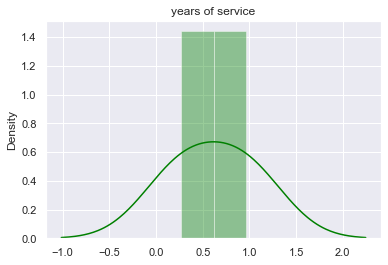

In [52]:
sns.distplot(x[0], color='green')
plt.title("years of service")
plt.show()

so we can see that all the colummn which has little of skewness present is now changed to normal distribution plot

Feature Scaling using Standard Scaler

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x

array([[ 2.68885831e-01,  9.62915374e-01],
       [ 1.20900603e-01,  1.76699933e+00],
       [-1.28449532e+00, -1.25634534e+00],
       [ 1.46109915e+00,  2.11371205e-01],
       [ 1.55315864e+00,  1.01020622e+00],
       [-8.40053119e-01, -4.61859092e-01],
       [ 6.03379808e-01,  1.80513534e+00],
       [ 1.72997607e+00,  1.17420107e+00],
       [ 4.08142448e-01,  3.52843452e-01],
       [ 2.68885831e-01,  6.56774129e-01],
       [-6.03480739e-01,  3.70730956e-01],
       [-1.47508922e+00, -1.25376757e+00],
       [-1.70716059e+00, -1.36364922e+00],
       [-2.02223253e+00, -1.34774601e+00],
       [ 2.68885831e-01, -1.53983281e-01],
       [-1.28449532e+00,  2.83670548e-01],
       [ 4.08142448e-01, -3.00587849e-01],
       [ 1.21866709e+00, -2.05362588e-01],
       [ 6.03379808e-01,  5.27625004e-01],
       [ 1.31789249e+00,  8.87220841e-01],
       [ 7.85006224e-01, -7.82800376e-01],
       [ 1.06349813e+00, -2.38880223e-01],
       [ 1.00992197e+00, -5.91975986e-01],
       [ 3.

Creating the Model for predictions

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Splitting the DataFrame into train_test_split

Testing diffrent algorithms

LINEAR REGRESSION

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=250, test_size=0.20)
lr= LinearRegression( positive=True, n_jobs=2)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Result  from Linear regression model')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

Result  from Linear regression model
R2 score is  0.9731334810168581
mean_squared_error 18741650.93970076


In [74]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
lasso_reg =linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [75]:
lasso_reg.score(x_test,y_test)

0.9743541262337363

RANDOM FOREST

In [76]:
rf=RandomForestRegressor(n_estimators=10, bootstrap=True, random_state=2000)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('result  from random_forestregressor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

result  from random_forestregressor
R2 score is  0.9997770724687142
mean_squared_error 161428.0241772148


SVM REGRESSOR

In [77]:
from sklearn.svm import SVR
sv = SVR(kernel ='rbf', gamma=1, epsilon=3)
sv.fit(x_train, y_train)
pred_sv= sv.predict(x_test)
print('result  from svm regrssor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

result  from svm regrssor
R2 score is  0.9997770724687142
mean_squared_error 161428.0241772148


KNN REGRESSOR

In [78]:
from sklearn.neighbors  import KNeighborsRegressor
kn =KNeighborsRegressor(n_neighbors=7, algorithm='kd_tree', weights='distance')
kn.fit(x_train, y_train)
pred_kn= kn.predict(x_test)
print('result  from knn regressor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

result  from knn regressor
R2 score is  0.9997770724687142
mean_squared_error 161428.0241772148


In [80]:
import pickle
filename='salary _predictions'
pickle.dump(kn,open(filename,'wb'))

In [81]:
import numpy as np
a =np.array(y_test)
predicted=np.array(kn.predict(x_test))
df_sal=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
df_sal

,Orginal,Predicted
0,134690,133891.224260
1,77000,77000.000000
2,93000,94769.517931
3,83000,82239.904695
4,78162,80486.464739
...,...,...
74,94350,95715.265523
75,70700,75369.938381
76,111350,112007.836194
77,70768,72826.029013
